cost  -1674.77477367  classification_rate  0.3466666666666667
cost  -1529.94421045  classification_rate  0.364
cost  -1413.37925317  classification_rate  0.39666666666666667
cost  -1319.56072617  classification_rate  0.43533333333333335
cost  -1243.90608267  classification_rate  0.4786666666666667
cost  -1182.68404915  classification_rate  0.536
cost  -1132.89626349  classification_rate  0.6006666666666667
cost  -1092.15490434  classification_rate  0.6693333333333333
cost  -1058.56999355  classification_rate  0.716
cost  -1030.6516136  classification_rate  0.748
cost  -1007.22802977  classification_rate  0.7733333333333333
cost  -987.378724948  classification_rate  0.792
cost  -970.380535735  classification_rate  0.8126666666666666
cost  -955.664848563  classification_rate  0.8253333333333334
cost  -942.783880172  classification_rate  0.8293333333333334
cost  -931.384274147  classification_rate  0.832
cost  -921.186505615  classification_rate  0.8393333333333334
cost  -911.968850213  c

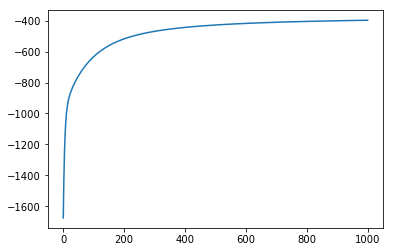

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid_(X):
    Z = 1/(1 + np.exp(-X))
    return Z

#Forward function
def forward(X,W1,b1,W2,b2):
    Z = sigmoid_(X.dot(W1) + b1)
    #Now we calculate the softmax of the last activation
    A = Z.dot(W2) + b2
    expA = np.exp(A)
    Y = expA/expA.sum(axis=1, keepdims=True)
    return Y, Z
    
#function to compute accuracy: takes the target and the predictions 
def accuracy_(Y, P):
    correct_nbr=0
    total_number=0
    for i in range(len(Y)):
        total_number+=1
        if (Y[i]==P[i]):
            correct_nbr+=1
    return float(correct_nbr)/total_number


def derivative_w2(Z, T, Y):
    N, K = T.shape
    M = Z.shape[1] 
    ret = np.zeros((M, K))
    ret = Z.T.dot(T-Y)
    return ret

def derivation_b2(T, Y):
    return (T- Y).sum(axis=0)


def derivative_W1(X, Z, T, Y, W2):
    N, D = X.shape
    M, K = W2.shape
    dZ = (T-Y).dot(W2.T)*Z*(1-Z)
    return X.T.dot(dZ)
    

def derivative_b1(T, Y, W2, Z):
    return ((T-Y).dot(W2.T)*Z*(1-Z)).sum(axis=0)


def cost(T, Y):
    t = T * np.log(Y)
    return t.sum()


def main():
    #create data
    D = 2
    M = 3
    K = 3
    
    NClass=500
    # np.random.randn: 
    X1 = np.random.randn(NClass, 2) + np.array([0, -2])
    X2 = np.random.randn(NClass, 2) + np.array([2, -2])
    X3 = np.random.randn(NClass, 2) + np.array([-2, 2])

    X = np.vstack([X1,X2,X3])
    Y = np.array([0]*NClass + [1]*NClass + [2]*NClass)

    N = len(Y)
    #indicator variable
    T = np.zeros((N,K))
    for i in range(N):
        T[i, Y[i]] = 1
    
    #Random initialization
    W1 = np.random.randn(D,M)
    b1 = np.random.randn(M)
    W2 = np.random.randn(M,K)
    b2 = np.random.randn(K)
    
    #BackProp parameters
    learning_rate = 10e-7
    costs = []
    
    for epoch in range(100000):
        out, hid = forward(X,W1,b1,W2,b2)
        if epoch%100 == 0:
            c = cost(T, out)
            P = np.argmax(out, axis=1)
            r = accuracy_(Y, P)
            costs.append(c)
            print("cost ", c, " classification_rate ", r)
        
        W2 += learning_rate * derivative_w2(hid, T, out)
        b2 += learning_rate * derivation_b2(T, out)
        W1 += learning_rate * derivative_W1(X, hid, T, out, W2)
        b1 += learning_rate * derivative_b1(T, out, W2, hid)
        
    plt.plot(costs)
    plt.show()
    
        
if __name__ == '__main__':
    main()









